In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_movies (1).csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
df_cleaned = df.dropna(subset=['director', 'cast', 'country', 'rating'])

df_cleaned['date_added'] = df_cleaned['date_added'].str.strip()

df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'], errors='coerce')

df_cleaned = df_cleaned.dropna(subset=['date_added'])

df_cleaned['year_added'] = df_cleaned['date_added'].dt.year
df_cleaned['month_added'] = df_cleaned['date_added'].dt.month_name()

print("\nCleaned Dataset Information:")
df_cleaned.info()


Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 5335 entries, 7 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5335 non-null   object        
 1   type          5335 non-null   object        
 2   title         5335 non-null   object        
 3   director      5335 non-null   object        
 4   cast          5335 non-null   object        
 5   country       5335 non-null   object        
 6   date_added    5335 non-null   datetime64[ns]
 7   release_year  5335 non-null   int64         
 8   rating        5335 non-null   object        
 9   duration      5332 non-null   object        
 10  listed_in     5335 non-null   object        
 11  description   5335 non-null   object        
 12  year_added    5335 non-null   int32         
 13  month_added   5335 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(11)
memory usa

<ipython-input-11-11c863dec822>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date_added'] = df_cleaned['date_added'].str.strip()
<ipython-input-11-11c863dec822>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'], errors='coerce')


<ipython-input-12-0b90abb3e4cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='type', palette='Set2')


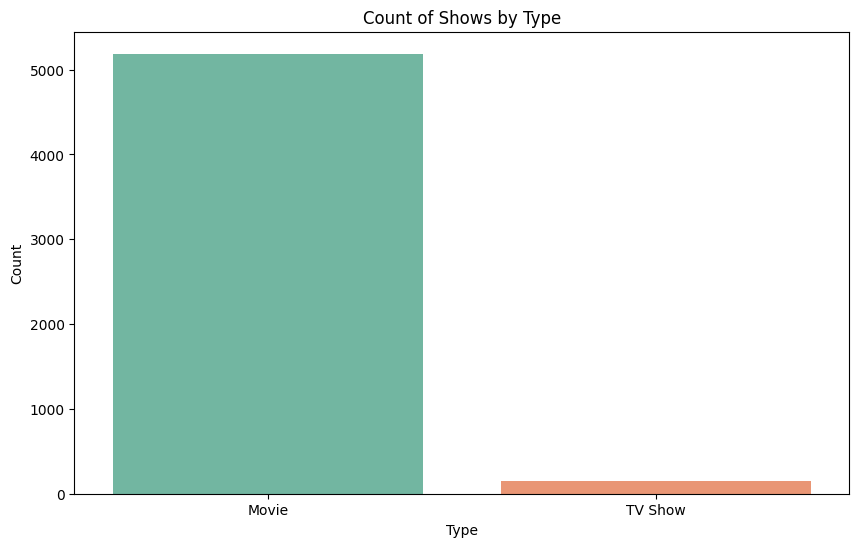

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='type', palette='Set2')
plt.title('Count of Shows by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

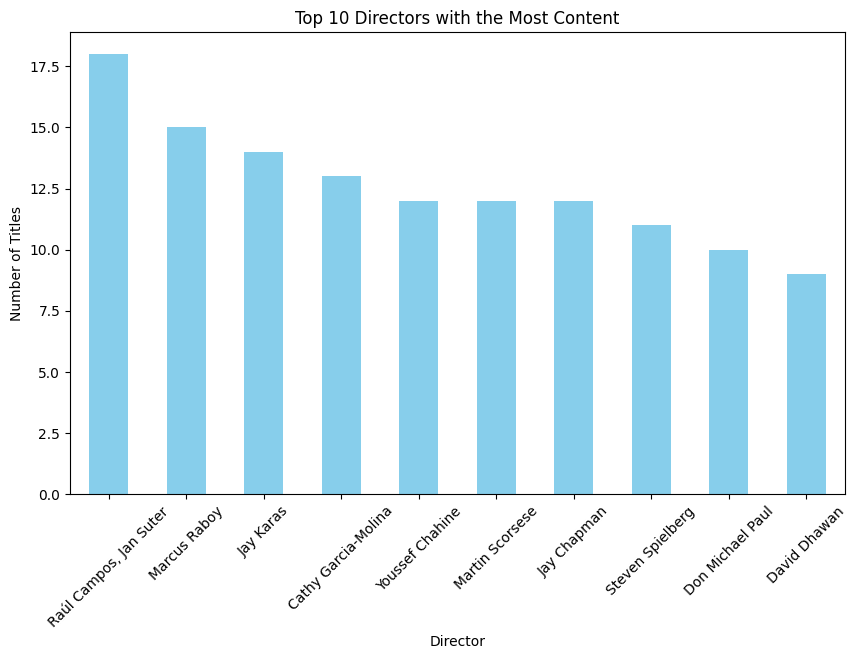

In [ ]:
top_directors = df_cleaned['director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Directors with the Most Content')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

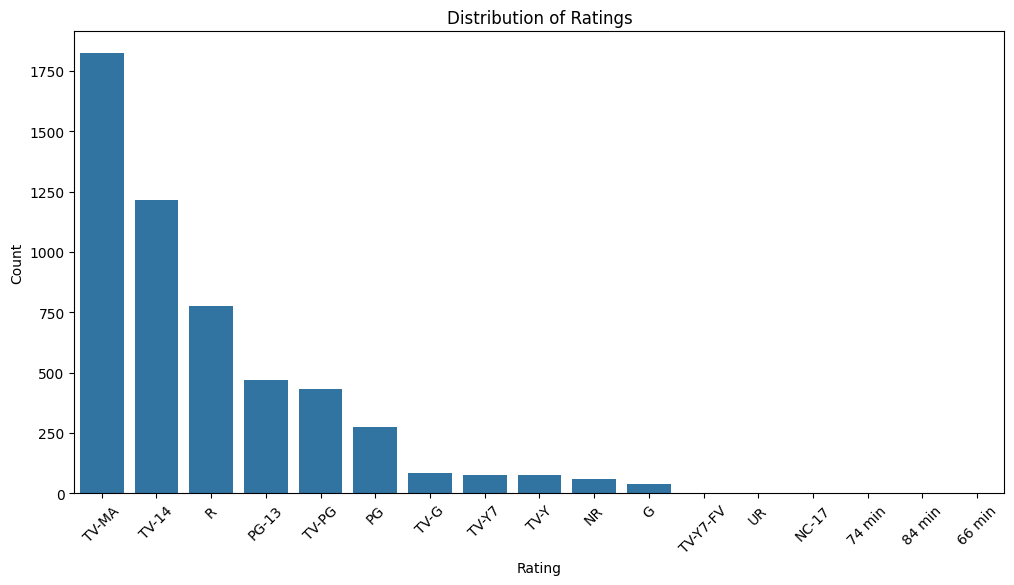

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='rating', order=df_cleaned['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

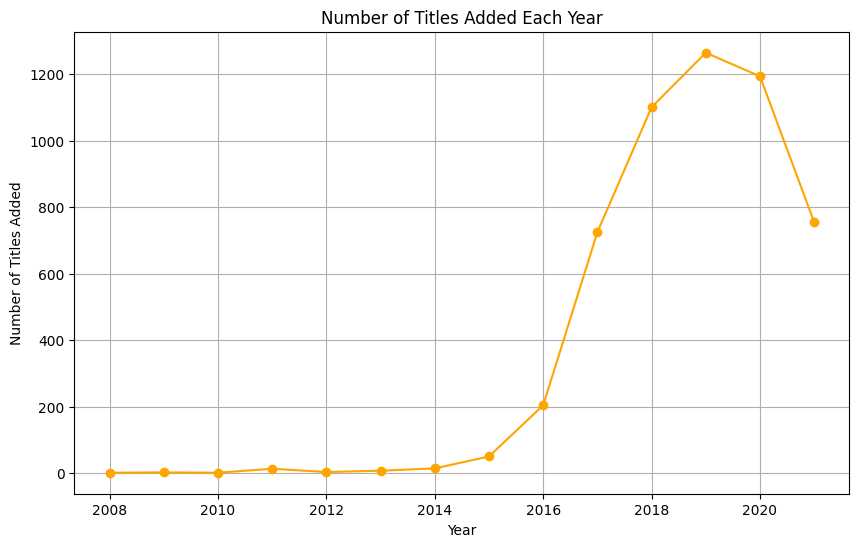

In [ ]:
titles_per_year = df_cleaned['year_added'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
titles_per_year.plot(kind='line', marker='o', color='orange')
plt.title('Number of Titles Added Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid()
plt.show()

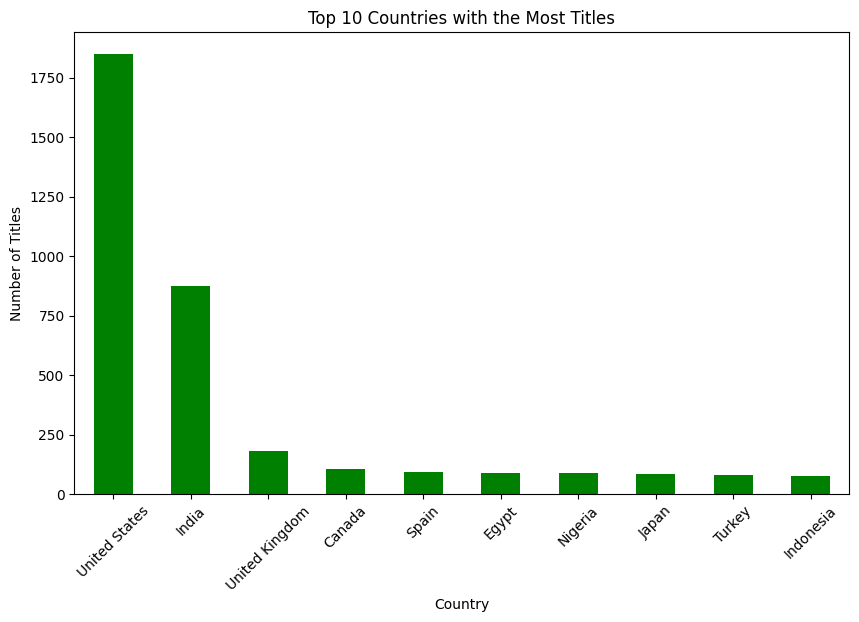

In [ ]:
top_countries = df_cleaned['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='green')
plt.title('Top 10 Countries with the Most Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

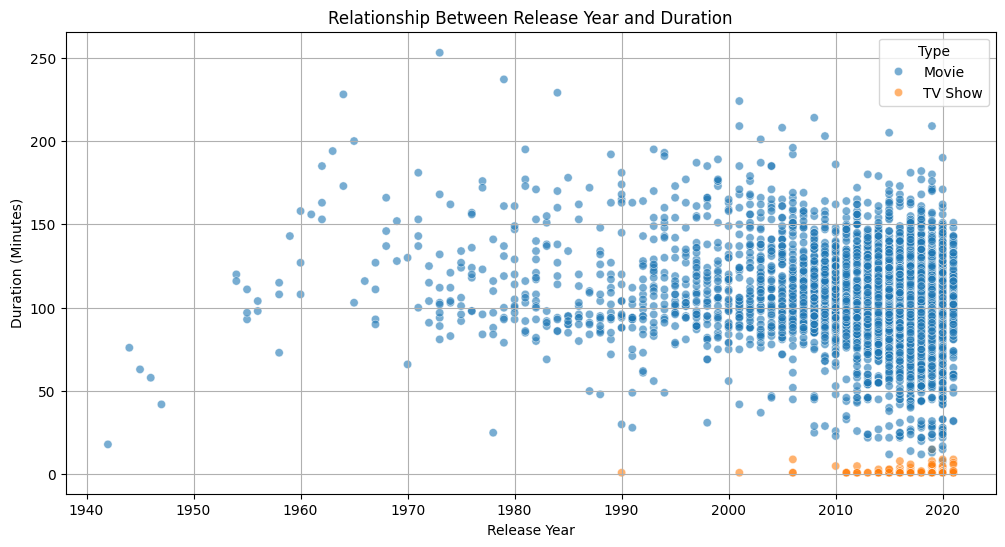

In [ ]:
df_cleaned['duration_numeric'] = df_cleaned['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cleaned, x='release_year', y='duration_numeric', hue='type', alpha=0.6)
plt.title('Relationship Between Release Year and Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (Minutes)')
plt.legend(title='Type')
plt.grid()
plt.show()